In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
d=pd.read_csv("customers.csv")

In [3]:
d.head(2)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 919.2+ KB


In [5]:
d.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [6]:
d_cleaned=d.dropna(axis=0)

In [7]:
d_cleaned.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [8]:
d_cleaned['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [9]:
d_cleaned['Ever_Married'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
d_cleaned['Graduated'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
d_cleaned['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
       'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
      dtype=object)

In [12]:
d_cleaned['Segmentation'].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [13]:
d_cleaned['Spending_Score'].unique()

array(['Low', 'High', 'Average'], dtype=object)

In [14]:
from sklearn.preprocessing import OrdinalEncoder

In [17]:
Cat_list=[['Male', 'Female'],['No', 'Yes'],['No', 'Yes'],['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
       'Homemaker', 'Entertainment', 'Marketing', 'Executive'],['Low', 'High', 'Average']]

In [18]:
d1=d_cleaned.copy()

In [19]:
oe=OrdinalEncoder(categories=Cat_list)

In [20]:
d1[['Gender',
             'Ever_Married',
              'Graduated','Profession',
              'Spending_Score']]=oe.fit_transform(d1[['Gender',
                                                    'Ever_Married',
                                                    'Graduated','Profession',
                                                    'Spending_Score']])

In [21]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8819 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8819 non-null   int64  
 1   Gender           8819 non-null   float64
 2   Ever_Married     8819 non-null   float64
 3   Age              8819 non-null   int64  
 4   Graduated        8819 non-null   float64
 5   Profession       8819 non-null   float64
 6   Work_Experience  8819 non-null   float64
 7   Spending_Score   8819 non-null   float64
 8   Family_Size      8819 non-null   float64
 9   Var_1            8819 non-null   object 
 10  Segmentation     8819 non-null   object 
dtypes: float64(7), int64(2), object(2)
memory usage: 826.8+ KB


In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()

In [25]:
d1['Segmentation']=le.fit_transform(d1['Segmentation'])

In [26]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8819 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8819 non-null   int64  
 1   Gender           8819 non-null   float64
 2   Ever_Married     8819 non-null   float64
 3   Age              8819 non-null   int64  
 4   Graduated        8819 non-null   float64
 5   Profession       8819 non-null   float64
 6   Work_Experience  8819 non-null   float64
 7   Spending_Score   8819 non-null   float64
 8   Family_Size      8819 non-null   float64
 9   Var_1            8819 non-null   object 
 10  Segmentation     8819 non-null   int32  
dtypes: float64(7), int32(1), int64(2), object(1)
memory usage: 792.3+ KB


In [27]:
import seaborn as sns

C:\Users\SEC\AppData\Local\Temp\ipykernel_24556\2712151147.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = d1.corr()


<AxesSubplot: >

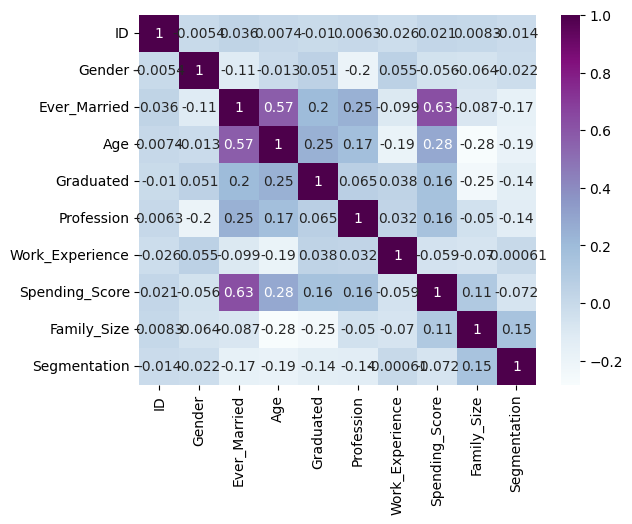

In [28]:
corr = d1.corr()

# Plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="BuPu",
        annot= True)

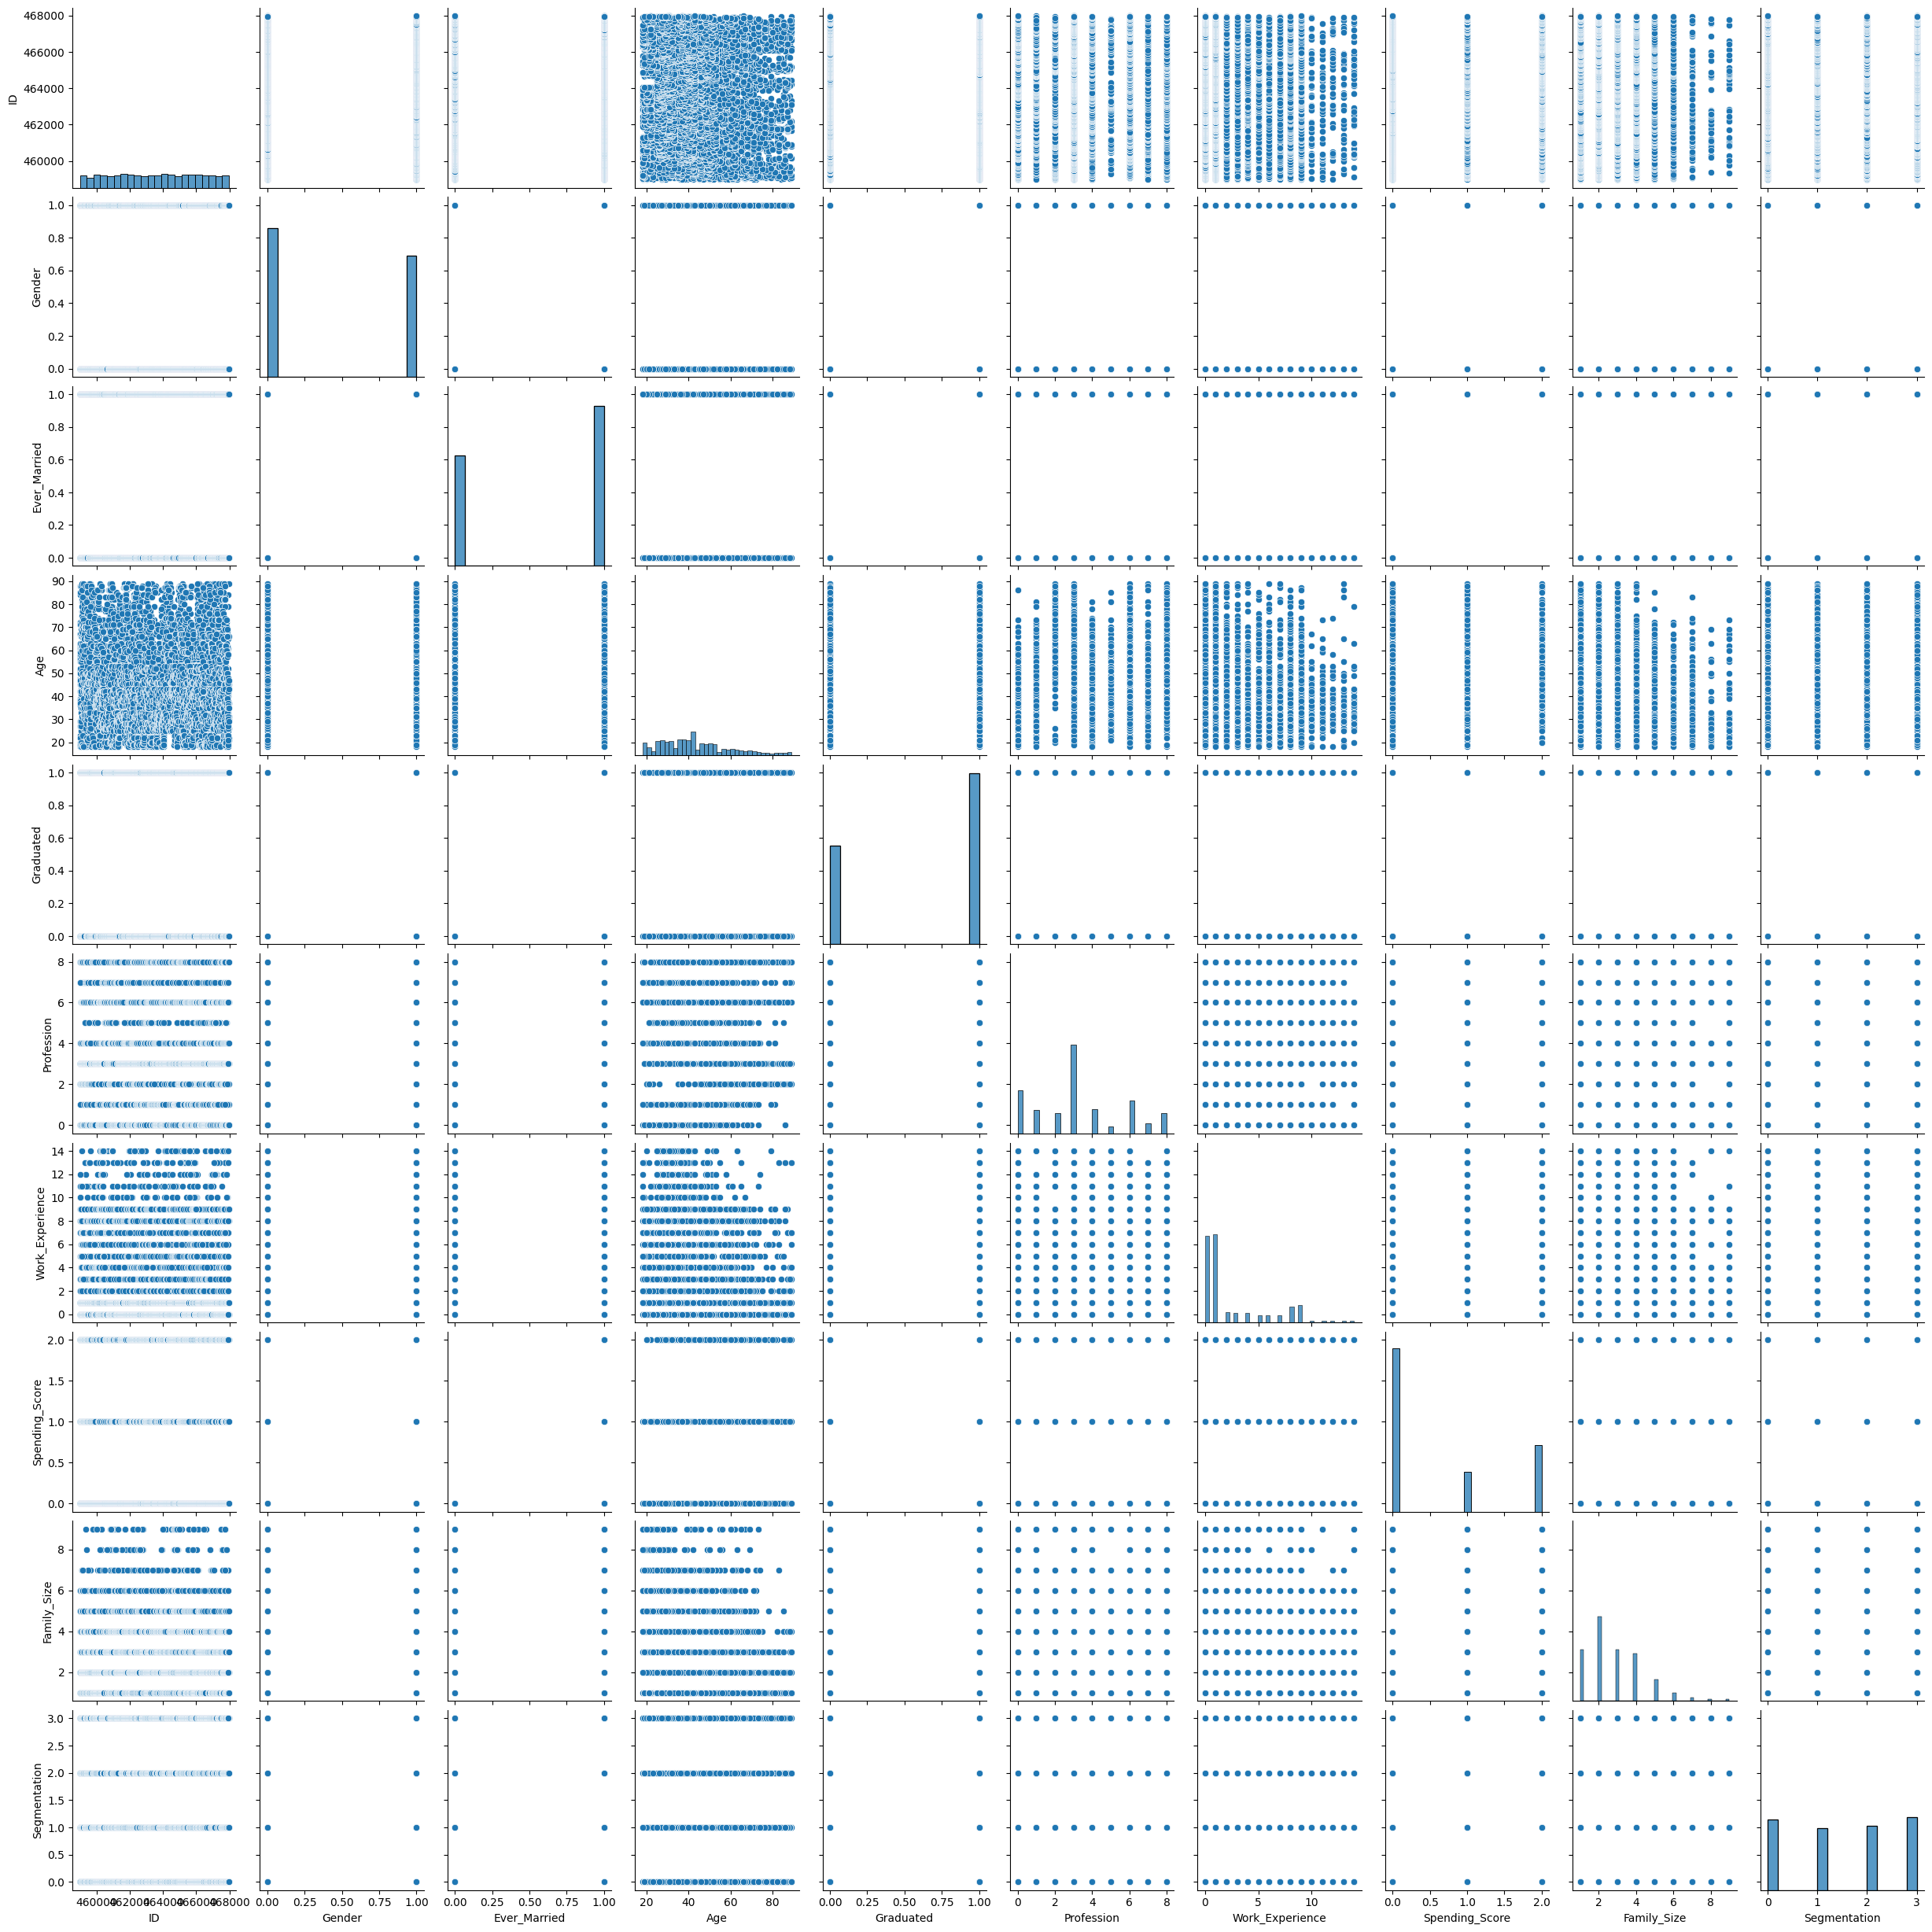

In [29]:
sns.pairplot(d1)

C:\Users\SEC\AppData\Local\Temp\ipykernel_24556\1084364454.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1['Age'])


<AxesSubplot: xlabel='Age', ylabel='Density'>

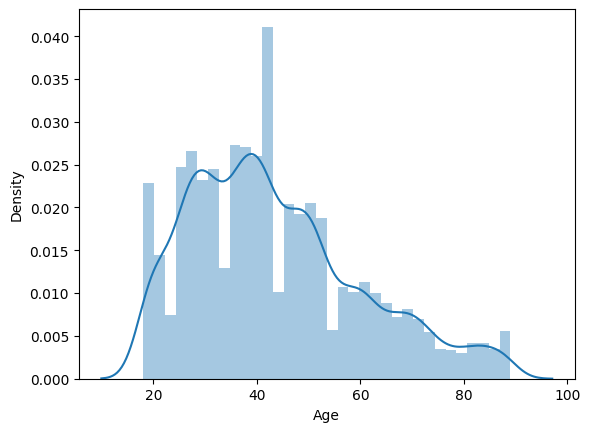

In [32]:
sns.distplot(d1['Age'])

In [33]:
import matplotlib.pyplot as plt

<AxesSubplot: ylabel='count'>

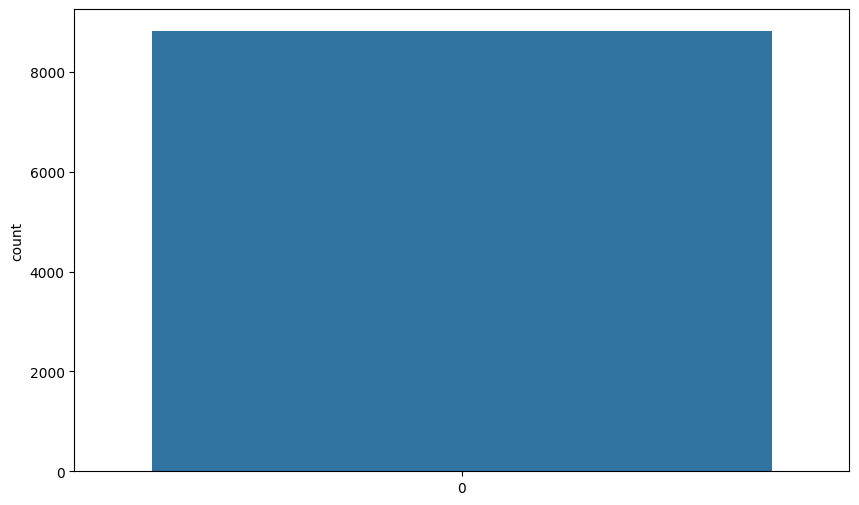

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(d1['Family_Size'])

In [35]:
d1.describe()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
count,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000
mean,463514.199796,0.448804,0.591450,43.517859,0.634312,3.287561,2.610160,0.643724,2.840118,1.518086
std,2572.440330,0.497400,0.491594,16.581537,0.481650,2.346652,3.390676,0.851172,1.535051,1.146645
min,458982.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,461330.500000,0.000000,0.000000,31.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
50%,463561.000000,0.000000,1.000000,41.000000,1.000000,3.000000,1.000000,0.000000,2.000000,2.000000
75%,465735.500000,1.000000,1.000000,53.000000,1.000000,5.000000,4.000000,1.000000,4.000000,3.000000
max,467974.000000,1.000000,1.000000,89.000000,1.000000,8.000000,14.000000,2.000000,9.000000,3.000000


In [167]:
X=d1[['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size']].values

In [168]:
y1=d1[['Segmentation']].values

In [169]:
from sklearn.preprocessing import OneHotEncoder

In [170]:
ohe=OneHotEncoder()

In [171]:
ohe.fit(y1)

OneHotEncoder()

In [172]:
y1.shape

(8819, 1)

In [173]:
y=ohe.transform(y).toarray()

In [174]:
y.shape

(8819, 4)

In [175]:
y1[0]

array([3])

In [176]:
y[0]

array([0., 0., 0., 1.])

In [177]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.33,
                                               random_state=50)

In [179]:
X_train[0]

array([ 1.,  1., 85.,  0.,  2.,  0.,  0.,  1.])

In [180]:
X_train.shape

(5908, 8)

In [146]:
from sklearn.preprocessing import MinMaxScaler

In [181]:
scaler_age = MinMaxScaler()

In [182]:
scaler_age.fit(X_train[:,2].reshape(-1,1))

MinMaxScaler()

In [183]:
X_train_scaled = np.copy(X_train)
X_test_scaled = np.copy(X_test)

In [184]:
X_train_scaled[:,2] = scaler_age.transform(X_train[:,2].reshape(-1,1)).reshape(-1)
X_test_scaled[:,2] = scaler_age.transform(X_test[:,2].reshape(-1,1)).reshape(-1)

In [185]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [218]:
model = Sequential([
    Dense(4, input_shape=(8,), activation='relu'),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4,activation='softmax')
])

In [219]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [220]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [221]:
model.fit(
    X_train_scaled,  
    y_train,         
    epochs=800,       
    batch_size=128,   
    validation_data=(X_test_scaled, y_test),
)

Epoch 1/800
47/47 [==============================] - 1s 5ms/step - loss: 1.6240 - accuracy: 0.2305 - val_loss: 1.4581 - val_accuracy: 0.2597
Epoch 2/800
47/47 [==============================] - 0s 3ms/step - loss: 1.4187 - accuracy: 0.2591 - val_loss: 1.3783 - val_accuracy: 0.2927
Epoch 3/800
47/47 [==============================] - 0s 3ms/step - loss: 1.3650 - accuracy: 0.3153 - val_loss: 1.3475 - val_accuracy: 0.3452
Epoch 4/800
47/47 [==============================] - 0s 3ms/step - loss: 1.3393 - accuracy: 0.3614 - val_loss: 1.3291 - val_accuracy: 0.3727
Epoch 5/800
47/47 [==============================] - 0s 3ms/step - loss: 1.3227 - accuracy: 0.3812 - val_loss: 1.3175 - val_accuracy: 0.3813
Epoch 6/800
47/47 [==============================] - 0s 3ms/step - loss: 1.3100 - accuracy: 0.3964 - val_loss: 1.3074 - val_accuracy: 0.3878
Epoch 7/800
47/47 [==============================] - 0s 3ms/step - loss: 1.2993 - accuracy: 0.4044 - val_loss: 1.2988 - val_accuracy: 0.3930
Epoch 8/800
4

In [222]:
metrics = pd.DataFrame(model.history.history)


In [223]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.624021,0.230535,1.458091,0.259705
1,1.418673,0.259140,1.378254,0.292683
2,1.364950,0.315335,1.347534,0.345242
3,1.339337,0.361374,1.329069,0.372724
4,1.322663,0.381178,1.317546,0.381312


<AxesSubplot: >

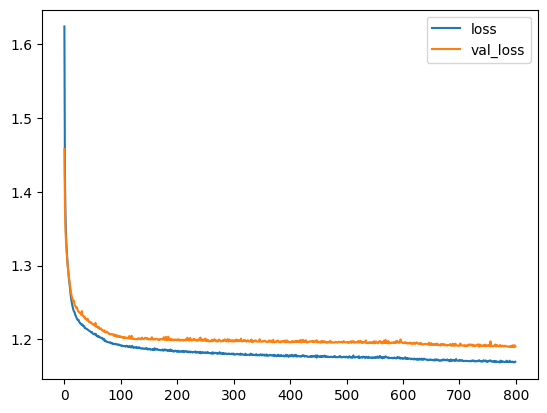

In [224]:
metrics[['loss','val_loss']].plot()

In [225]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

91/91 [==============================] - 0s 2ms/step


In [226]:
x_test_predictions.shape

(2911,)

In [227]:
y_test_truevalue = np.argmax(y_test,axis=1)

In [228]:
y_test_truevalue.shape

(2911,)

In [230]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test_truevalue,x_test_predictions))

[[349 113 102 193]
 [229 139 206 112]
 [124 106 356 100]
 [191  46  47 498]]


In [232]:
print(classification_report(y_test_truevalue,x_test_predictions))

              precision    recall  f1-score   support

           0       0.39      0.46      0.42       757
           1       0.34      0.20      0.26       686
           2       0.50      0.52      0.51       686
           3       0.55      0.64      0.59       782

    accuracy                           0.46      2911
   macro avg       0.45      0.45      0.44      2911
weighted avg       0.45      0.46      0.45      2911



In [234]:
x_single_prediction = np.argmax(model.predict(X_test_scaled[1:2,:]), axis=1)

1/1 [==============================] - 0s 24ms/step


In [235]:
print(x_single_prediction)

[2]


In [236]:
print(le.inverse_transform(x_single_prediction))

['C']
